#SDS 2021 - Deep Learning Models 실습

##Contents
- Text Mining
- Recommender System

## Text Mining

In [ ]:
# 한국어 plot을 하기 위한 설정

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작

Password:

### 꼭꼭꼭! 런타임을 다시 시작해 주세요.
### 런타임 다시 시작 후 처음부터 다시 실행해 주세요.

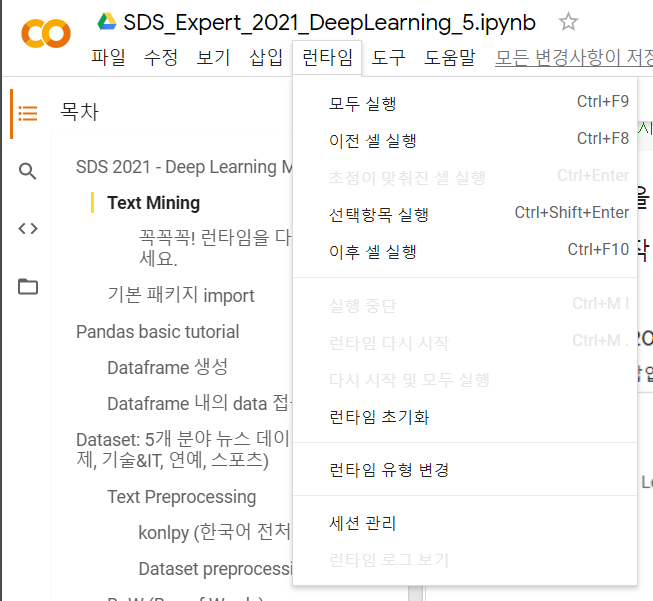

## 기본 패키지 import

In [ ]:
# 기본 패키지 import
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Pandas basic tutorial

Pandas Dataframe - 2차원 구조의 Data를 쉽게 저장/확인/수정하기 위한 방법으로 사용하는 data format.

### Dataframe 생성

In [ ]:
# pandas DataFrame 생성 기본 명령
# pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

import pandas as pd

df = pd.DataFrame([[1,2,3,4],[5,6,7,8]])
df

In [ ]:
# Array/List 형태의 data로 생성.
array_data = [[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]]
row = ['row0','row1','row2']
column = ['col0', 'col1', 'col2', 'col3']

data = pd.DataFrame(data=array_data, index=row, columns=column)
data

### Dataframe 내의 data 접근/수정

In [ ]:
# column으로 바로 접근
data['col0']

In [ ]:
# 특정 열에 접근
data.loc['row0',:]

In [ ]:
# 특정 행에 접근
data.loc[:,'col0']

In [ ]:
# 특정 data에 접근
data.loc['row0','col0']

In [ ]:
# 특정 data 수정
data.loc['row0','col0'] = 0
data

# Dataset: 5개 분야 뉴스 데이터셋 (정치, 경제, 기술&IT, 연예, 스포츠)

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
# https://drive.google.com/file/d/1Tj3sWWGYEkD7gvv7ALudQ4UQ0DjavlT0/view?usp=sharing
# https://drive.google.com/file/d/19K2ziuoc-pZFoXS4wD48PPSCtz1kNT7U/view?usp=sharing
# https://drive.google.com/file/d/1_0qnIya4XGoO5qEmx9isW8i2P4_HpsLw/view?usp=sharing
gdd.download_file_from_google_drive(
    file_id='1_0qnIya4XGoO5qEmx9isW8i2P4_HpsLw',
    dest_path='./NewsData.csv',
)

In [ ]:
dataset = pd.read_csv('./NewsData.csv')

dataset = dataset.sample(frac=1).reset_index(drop=True)

print('# of News data:',len(dataset))
dataset.head()

## Text Preprocessing

In [ ]:
dataset['title'][0]  # 하나의 문장을 tokenize, 조사 제거 등 전처리 작업 필요.

### konlpy (한국어 전처리 패키지)

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Okt

Okt = Okt()  # Okt (Open Korean Text)

example = '맷돌 손잡이를 어이라 그래요 어이.'

# 명사 추출
print(Okt.nouns(example))

# 형태소 추출
print(Okt.morphs(example))

# 품사 부착
print(Okt.pos(example))

가장 작은 단위인 형태소로 분해하고 불용어를 제거하는 형태로 전처리를 진행.

### Dataset preprocessing

In [ ]:
document = dataset['title'][0]
document

In [ ]:
import re

#불용어 정의
stopwords = ['의','가','이','은','로','및','들','는','좀','잘','걍','과','도','을','를','에게','으로','자','에','와','어','하','한','하다','한다','라는','된','에서','하고','할','될','이다','있다','이었다','했다','하는','있는','죠','입니다','됐다','까지']

tokenized_data = []
for index in range(len(dataset['title'])):
    element = dataset.loc[index,'title']

    # 특수문자 제거
    element = re.sub(r"[^ 가-힣a-zA-Z0-9]", ' ', element)

    # 형태소 추출
    element = Okt.morphs(element)

    # 불용어 제거
    element = [word for word in element if not word in stopwords]   # 불용어 제거

    # preprocessing을 거친 data로 수정
    tokenized_data.append(element)
    element = ' '.join(elem for elem in element)
    dataset.loc[index,'title'] = element

In [ ]:
dataset['title'][0]  # 변환된 text

## BoW (Bag of Words)
document 1개에 대해서만 BoW 실행

In [ ]:
document = ['맷돌 손잡이를 어이라 그래요 어이']

In [ ]:
document = dataset['title'][:1]

# sklearn 사용하여 BoW
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
bow = vect.fit_transform(document).toarray()
word_column = vect.get_feature_names()

In [ ]:
pd.DataFrame(data=bow, columns=word_column)

## DTM (Document-Term Matrix)
각 document들의 BoW를 하나의 행렬로 나타낸 것

In [ ]:
document = ['맷돌 손잡이를 어이라 그래요 어이', '맷돌 손잡이 알아요?', '황당하잖아? 아무것도 아닌 손잡이 때문에 해야 할 일을 못하니까']

In [ ]:
document = dataset['title'][:5]

vect = CountVectorizer()
BoW = vect.fit_transform(document).toarray()
word_column = vect.get_feature_names()

In [ ]:
# DTM
pd.DataFrame(data=BoW, columns=word_column)

## TF-IDF (Term Frequency-Inverse Document Frequency)

BoW처럼 단어의 출현 빈도(Term Frequency)만 고려하는 것이 아닌, Inverse Document Frequency도 고려하여 각 단어의 중요 정도를 가중치로 주는 방법.

In [ ]:
document = dataset['title'][:5]

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer()
Tfidf = Tfidf_vect.fit_transform(document).toarray()
word_column = Tfidf_vect.get_feature_names()

In [ ]:
# DTM (TfIdf applied)
pd.DataFrame(data=Tfidf, columns=word_column)

# Topic Modeling

## LDA (Latent Dirichlet Allocation)

In [ ]:
# 1000개의 data에 대해 진행
document = dataset['title']

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer()
Tfidf = Tfidf_vect.fit_transform(document).toarray()
word_index = Tfidf_vect.get_feature_names()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=3, random_state=0)
lda = lda.fit(Tfidf)

In [ ]:
import numpy as np
topic_word_dist = lda.components_
doc_topic_dist = lda.transform(Tfidf)

# normalize
doc_topic_dist /= doc_topic_dist.sum(axis=1)[:, np.newaxis]
lda.components_ /= lda.components_.sum(axis=1)[:, np.newaxis]

In [ ]:
# lda.componenets_ : 각 topic에 대한 word의 비중 분포
# lda.transform(Tfidf) : 각 document에 대한 topic의 비중 분포
topic_word_dist.shape, doc_topic_dist.shape

#### Document에 대한 Topic distribution

In [ ]:
# column names
topicnames = ['Topic_' + str(i) for i in range(1, len(topic_word_dist)+1)]

# index names
docnames = ['Doc_' + str(i) for i in range(1, len(doc_topic_dist)+1)]

# create a dataframe
df_document_topic = pd.DataFrame(data=doc_topic_dist, columns=topicnames, index=docnames)

# create dominant topic column
df_document_topic['Dominant_Topic'] = df_document_topic.idxmax(axis=1)
df_document_topic['Dominant_Topic_Score'] = df_document_topic.max(axis=1)

df_document_topic.head()

#### Topic에 대한 word distribution

In [ ]:
plt.rc('font', family='NanumBarunGothic')
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)     # 1 x 4의 subplots 생성

    topic_dist = model.components_
    for topic_idx, topic in enumerate(topic_dist):
        top_features_ind = topic.argsort()[::-1]                      # 값이 낮은 순으로 index를 정렬. [::-1]은 역순으로 바꾸어 줌.
        top_features_ind = top_features_ind[:n_top_words]             # 값이 가장 높은(비중이 높은) word를 n_top_words만큼 뽑기.
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)                    # horizontal bar
        ax.set_title('Topic '+str(topic_idx+1), fontdict={'fontsize': 30})
        ax.invert_yaxis()                                             # bar가 긴 것이 위로 오게 invert
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():                            # 아래 눈금을 제외한 subplot의 테두리 제거.
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

In [ ]:
plot_top_words(lda, Tfidf_vect.get_feature_names(), 10, 'Topics in LDA model')

In [ ]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import numpy as np
lda_vis = pyLDAvis.sklearn.prepare(lda, np.matrix(Tfidf), Tfidf_vect, mds='tsne')
pyLDAvis.display(lda_vis)

## Word Cloud

In [ ]:
def plot_wordcloud(model, feature_names):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True, sharey=True)     # 1 x 4의 subplots 생성
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        topic_word_dict = {}
        for i, word in enumerate(feature_names):
            topic_word_dict[word] = topic[i]                                      # 특정 topic에 대한 word들의 비중(중요도)을 dictionary 형태로 저장.

        ax = axes[topic_idx]
        ax.set_title('Topic '+str(topic_idx+1), fontdict={'fontsize': 20})
        wordcloud.generate_from_frequencies(topic_word_dict)
        ax.imshow(wordcloud)
        ax.axis('off')

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path= 'NanumBarunGothic',
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10)

plot_wordcloud(lda, Tfidf_vect.get_feature_names())

#추천 시스템 (Recommender System)

### 필요한 데이터와 코드 다운로드

In [ ]:
# 데이터 파일과 전처리 코드
# 압축 파일을 다운로드 받고, 압축을 푼 후, 압축파일은 삭제하는 코드.

from google_drive_downloader import GoogleDriveDownloader as gdd
# https://drive.google.com/file/d/1LNZjlj7d532L7_fW2sExm0MgCLSm6xlv/view?usp=sharing
gdd.download_file_from_google_drive(
    file_id='1LNZjlj7d532L7_fW2sExm0MgCLSm6xlv',
    dest_path='./Recommender_System.zip',
)

!unzip Recommender_System.zip
!rm -rf Recommender_System.zip

print("데이터 다운로드 완료!")

Colab 환경 세팅

In [ ]:
import os
import copy
from os.path import join
import warnings

import torch
import torch.nn as nn
import numpy as np
import random

# colab에서 나오는 warning들을 무시합니다.
warnings.filterwarnings('ignore')

# 결과 재현을 위해 해당 코드에서 사용되는 라이브러리들의 Seed를 고정합니다.
def seed_everything(random_seed):
    torch.manual_seed(random_seed)
    torch.set_deterministic(True)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

seed = 1
seed_everything(seed)

###Matrix Factorization (MF) Model-based Collaborative Filtering

목표 : User와 Item을 각각 latent vector로 표현하고자 함. (Word2Vec의 아이디어와 유사)</br>
user와 item을 k 차원의 vector로 표현하고자 함.</br> 
(user*item - target)^2 의 차이를 줄여 user와 item의 latent vector를 학습하는 방법.

그리고 이후 학습한 user와 item vector를 통해 예측한 값으로, user가 보지 않았던 item에 대한 값을 활용하여 추천에 활용하는 방법.

In [ ]:
import numpy as np
import torch
from utils.load_data import data_loading
from utils.load_data import get_titles
from utils.evaluation import evaluation

# 데이터 불러오기
train_matrix, test_matrix, num_users, num_items = data_loading()

In [ ]:
class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        self.user_factors = torch.nn.Embedding(n_users, n_factors, sparse=False)
        self.item_factors = torch.nn.Embedding(n_items, n_factors, sparse=False)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self):
        return self.sigmoid(torch.matmul(self.user_factors.weight, self.item_factors.weight.T))

In [ ]:
# 하이퍼파라미터 설정
num_epochs = 550
learning_rate = 1e-2
num_factors = 64

# Pytorch를 이용해, MF 모델 만들기
model = MatrixFactorization(num_users, num_items, n_factors=num_factors).cuda()
loss_func = torch.nn.BCELoss() #MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # learning rate

In [ ]:
ratings = torch.FloatTensor(train_matrix).cuda() # training matrix를 복사

# 사용자 시청 정보를 이용하여 U와 V를 업데이트 함.
for epoch in range(num_epochs):
    total_loss = 0
    optimizer.zero_grad()

    # 예측
    prediction = model.forward()
    loss = loss_func(prediction, ratings)

    # Backpropagate
    loss.backward()

    # Update the parameters
    optimizer.step()

In [ ]:
predicted_matrix = np.zeros((train_matrix.shape))
rows, cols = predicted_matrix.nonzero()

# MF를 이용하여 전체 항목의 값을 예측함.
with torch.no_grad():
    predicted_matrix = model.forward().cpu().numpy()

# 평가
hit50, hit100 = evaluation(predicted_matrix, train_matrix, test_matrix)
print("Hit@50:  ", hit50)
print("Hit@100: ", hit100)


# 시청 항목과 추천 항목 출력
print("-----------------------------------------------------")
u_id = 201
titles = get_titles()

print("사용자 시청 영화")
rated_items = np.where(train_matrix[u_id] == 1)[0]
rated_items = rated_items[0:20]
for i in rated_items:
    print(titles[i])

print("-----------------------------------------------------")

print("추천 영화 Top 20")
predicted_matrix[u_id, rated_items] = 0
topN_items = np.argsort(predicted_matrix[u_id])
topN_items = topN_items[::-1]
topN_items = topN_items[0:20]
for i in topN_items:
    print(titles[i])

# 과제: 3개의 Topic으로 하여 LDA 적용해보기

In [ ]:
# 기본 패키지 import
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Dataset 받기

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
# https://drive.google.com/file/d/1Tj3sWWGYEkD7gvv7ALudQ4UQ0DjavlT0/view?usp=sharing
# https://drive.google.com/file/d/19K2ziuoc-pZFoXS4wD48PPSCtz1kNT7U/view?usp=sharing
# https://drive.google.com/file/d/1_0qnIya4XGoO5qEmx9isW8i2P4_HpsLw/view?usp=sharing
gdd.download_file_from_google_drive(
    file_id='1_0qnIya4XGoO5qEmx9isW8i2P4_HpsLw',
    dest_path='./NewsData.csv',
)

In [ ]:
dataset = pd.read_csv('./NewsData.csv')

dataset = dataset.sample(frac=1).reset_index(drop=True)

print('# of News data:',len(dataset))
dataset.head()

## Text 전처리

In [ ]:
!pip install konlpy
from konlpy.tag import Okt
Okt = Okt()  # Okt (Open Korean Text)

import re

#불용어 정의
stopwords = ['의','가','이','은','로','및','들','는','좀','잘','걍','과','도','을','를','에게','으로','자','에','와','어','하','한','하다','한다','라는','된','에서','하고','할','될','이다','있다','이었다','했다','하는','있는','죠','입니다','됐다','까지']

tokenized_data = []
for index in range(len(dataset['title'])):
    element = dataset.loc[index,'title']

    # 특수문자 제거
    element = re.sub(r"[^ 가-힣a-zA-Z0-9]", ' ', element)

    # 형태소 추출
    element = Okt.morphs(element)

    # 불용어 제거
    element = [word for word in element if not word in stopwords]   # 불용어 제거

    # preprocessing을 거친 data로 수정
    tokenized_data.append(element)
    element = ' '.join(elem for elem in element)
    dataset.loc[index,'title'] = element

## TF-IDF

In [ ]:
# 1000개의 data에 대해 진행
document = dataset['title']

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer()
Tfidf = Tfidf_vect.fit_transform(document).toarray()
word_index = Tfidf_vect.get_feature_names()

## LDA (LDA의 n_components를 맞게 조절해 주세요)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=, random_state=0)
lda = lda.fit(Tfidf)

In [ ]:
topic_word_dist = lda.components_
doc_topic_dist = lda.transform(Tfidf)

# normalize
doc_topic_dist /= doc_topic_dist.sum(axis=1)[:, np.newaxis]
lda.components_ /= lda.components_.sum(axis=1)[:, np.newaxis]

## Document에 대한 Topic distribution

In [ ]:
# column names
topicnames = ['Topic_' + str(i) for i in range(1, len(topic_word_dist)+1)]

# index names
docnames = ['Doc_' + str(i) for i in range(1, len(doc_topic_dist)+1)]

# create a dataframe
df_document_topic = pd.DataFrame(data=doc_topic_dist, columns=topicnames, index=docnames)

# create dominant topic column
df_document_topic['Dominant_Topic'] = df_document_topic.idxmax(axis=1)
df_document_topic['Dominant_Topic_Score'] = df_document_topic.max(axis=1)

df_document_topic.head()

## Topic에 대한 Document distribution (3번째 plt.subplots를 맞게 조절해 주세요. 굳이 안해도 크게 상관 없습니다.)

In [ ]:
plt.rc('font', family='NanumBarunGothic')
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1,3, figsize=(30, 15), sharex=True)     # 1 x 4의 subplots 생성

    topic_dist = model.components_
    for topic_idx, topic in enumerate(topic_dist):
        top_features_ind = topic.argsort()[::-1]                      # 값이 낮은 순으로 index를 정렬. [::-1]은 역순으로 바꾸어 줌.
        top_features_ind = top_features_ind[:n_top_words]             # 값이 가장 높은(비중이 높은) word를 n_top_words만큼 뽑기.
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)                    # horizontal bar
        ax.set_title('Topic '+str(topic_idx+1), fontdict={'fontsize': 30})
        ax.invert_yaxis()                                             # bar가 긴 것이 위로 오게 invert
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():                            # 아래 눈금을 제외한 subplot의 테두리 제거.
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

plot_top_words(lda, Tfidf_vect.get_feature_names(), 10, 'Topics in LDA model')